In [48]:
import nltk, os, matplotlib as mlt, sys
from matplotlib import pyplot as plt
import sklearn as sk, pandas as pd, numpy as np
import re, string as str
from nltk.corpus import stopwords
import time
os.chdir("E:\\CSE 258\\Homework\\Assignment2\\fake-news")
# nltk.download('punkt')
# nltk.download("stopwords")
# nltk.download("wordnet")

In [2]:
df = pd.read_csv("FakeNews_Clean_All.csv")

In [4]:
df.text = df.text.str.replace("\n", "")
df.text[0]

'Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? Here we go again another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! Weve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our systemIts way out of control! More Related'

In [5]:
df['nExclams'] =  df.text.str.count("!")

In [6]:
def count_caps(s):
    return np.sum([x.isupper() for x in s.split()])

df['Capital Words'] = df.text.apply(count_caps)

In [7]:
# Tokenizing text into bags of words
from nltk.tokenize import word_tokenize
def tokenize_s(s):
    return word_tokenize(s.decode('utf-8'))
df.text = df.text.apply(tokenize_s)

In [8]:
# Removing punctuation
import regex as re
import string
def remove_puncs(old_s):
    new_s = []
    for token in old_s:
        new_token = re.sub(ur"[0-9]+|\p{P}+", u"", token)
        if not new_token == u"":
            new_s.append(new_token)
    return new_s

df.text = df.text.apply(remove_puncs)

In [15]:
# Cleaning text of stopwords
def remove_stopwords(old_s):
    new_s = []
    for word in old_s:
        if not word in stopwords.words('english'):
            new_s.append(word)
    return new_s

for i in range(len(df.text)):
    df.text[i] = remove_stopwords(df.text[i])
    if i%500 == 0:
        print(i)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500


In [16]:
# Saving it for the future use
df.to_csv("FakeNews_Tokenized and stopwords removed.csv", index = False)

In [40]:
# Stemming and Lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

tracer = np.arange(25)*500
start_time = time.time()
for i in range(len(df.text)):
    final_doc = []
    for word in df.text[i]:
        word = porter.stem(word)
        word = wordnet.lemmatize(word)
        final_doc.append(word)
    df.text[i] = final_doc
    if i in tracer:
        print(i,"th doc processed in %s seconds from the start"%(time.time() - start_time))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(0, 'th doc processed in 2.68300008774 seconds from the start')
(500, 'th doc processed in 117.42200017 seconds from the start')
(1000, 'th doc processed in 231.327000141 seconds from the start')
(1500, 'th doc processed in 349.572000027 seconds from the start')
(2000, 'th doc processed in 466.118000031 seconds from the start')
(2500, 'th doc processed in 578.06400013 seconds from the start')
(3000, 'th doc processed in 690.676000118 seconds from the start')
(3500, 'th doc processed in 803.610000134 seconds from the start')
(4000, 'th doc processed in 924.231000185 seconds from the start')
(4500, 'th doc processed in 1036.59300017 seconds from the start')
(5000, 'th doc processed in 1147.65700006 seconds from the start')
(5500, 'th doc processed in 1262.23300004 seconds from the start')
(6000, 'th doc processed in 1381.44500017 seconds from the start')
(6500, 'th doc processed in 1496.00800014 seconds from the start')
(7000, 'th doc processed in 1613.95700002 seconds from the start')
(

In [42]:
# Saving it for the future use
df.to_csv("FakeNews_Tokenized and stopwords removed.csv", index = False)

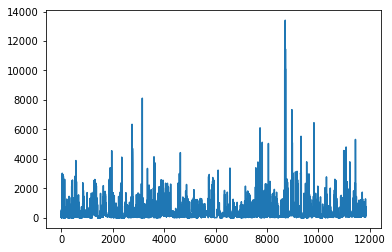

In [50]:
lengths = []
for doc in df.text:
    lengths.append(len(doc))

x = range(len(df.text))
plt.plot(x, lengths)
plt.show()

In [ ]:
sk.feature_extraction.text.TfidfVectorizer()